In [62]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress
import gmaps

# Create basic url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [63]:
# Create a series of random latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [64]:
# Add the list of latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [65]:
# Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [66]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | walvis bay
Processing Record 2 of Set 1 | husavik
Processing Record 3 of Set 1 | grand river south east
Processing Record 4 of Set 1 | oranjemund
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | illoqqortoormiut
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | kanniyakumari
Processing Record 13 of Set 1 | camacha
Processing Record 14 of Set 1 | el dorado
Processing Record 15 of Set 1 | umzimvubu
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | nove zamky
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | bafq
Processing Record 21 of Set 1 | barentsburg
Processing Record 22 of Set 1 | lyngseidet
Processing Re

In [67]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | walvis bay
Processing Record 2 of Set 1 | husavik
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | oranjemund
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | kanniyakumari
Processing Record 13 of Set 1 | camacha
Processing Record 14 of Set 1 | el dorado
Processing Record 15 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | nove zamky
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | bafq
Processing Recor

Processing Record 36 of Set 4 | cap malheureux
Processing Record 37 of Set 4 | luba
Processing Record 38 of Set 4 | englewood
Processing Record 39 of Set 4 | santa rosa
Processing Record 40 of Set 4 | porto novo
Processing Record 41 of Set 4 | nadvoitsy
Processing Record 42 of Set 4 | port-gentil
Processing Record 43 of Set 4 | sainte-marie
Processing Record 44 of Set 4 | atar
Processing Record 45 of Set 4 | conceicao da barra
Processing Record 46 of Set 4 | keffi
Processing Record 47 of Set 4 | grindavik
Processing Record 48 of Set 4 | soskovo
Processing Record 49 of Set 4 | paita
Processing Record 50 of Set 4 | navan
Processing Record 1 of Set 5 | olinda
Processing Record 2 of Set 5 | saint-ambroise
Processing Record 3 of Set 5 | anjangaon
Processing Record 4 of Set 5 | imperia
Processing Record 5 of Set 5 | brigantine
Processing Record 6 of Set 5 | naranjal
Processing Record 7 of Set 5 | marquette
Processing Record 8 of Set 5 | antsirabe
Processing Record 9 of Set 5 | floriano
Proce

Processing Record 25 of Set 8 | brownsburg
Processing Record 26 of Set 8 | andros town
Processing Record 27 of Set 8 | olindina
Processing Record 28 of Set 8 | ponta delgada
Processing Record 29 of Set 8 | buin
Processing Record 30 of Set 8 | sol-iletsk
Processing Record 31 of Set 8 | maine-soroa
Processing Record 32 of Set 8 | luanda
Processing Record 33 of Set 8 | monte santo
Processing Record 34 of Set 8 | bull savanna
Processing Record 35 of Set 8 | jasidih
Processing Record 36 of Set 8 | bondo
Processing Record 37 of Set 8 | camana
Processing Record 38 of Set 8 | trincomalee
Processing Record 39 of Set 8 | pires do rio
Processing Record 40 of Set 8 | fernandopolis
Processing Record 41 of Set 8 | caravelas
Processing Record 42 of Set 8 | santiago del estero
Processing Record 43 of Set 8 | grande-riviere
City not found. Skipping...
Processing Record 44 of Set 8 | klaksvik
Processing Record 45 of Set 8 | barra do garcas
Processing Record 46 of Set 8 | lucapa
Processing Record 47 of S

Processing Record 17 of Set 12 | chastyye
Processing Record 18 of Set 12 | mahibadhoo
Processing Record 19 of Set 12 | havoysund
Processing Record 20 of Set 12 | huarmey
Processing Record 21 of Set 12 | kuche
City not found. Skipping...
Processing Record 22 of Set 12 | el alto
Processing Record 23 of Set 12 | korla
Processing Record 24 of Set 12 | paamiut
Processing Record 25 of Set 12 | rawson
Processing Record 26 of Set 12 | jammu
Processing Record 27 of Set 12 | hobro
Processing Record 28 of Set 12 | blagoyevo
Processing Record 29 of Set 12 | burgeo
Processing Record 30 of Set 12 | sao felix do xingu
Processing Record 31 of Set 12 | lohja
Processing Record 32 of Set 12 | skala
Processing Record 33 of Set 12 | torit
Processing Record 34 of Set 12 | kidal
Processing Record 35 of Set 12 | maliq
Processing Record 36 of Set 12 | quelimane
Processing Record 37 of Set 12 | koslan
Processing Record 38 of Set 12 | tabory
Processing Record 39 of Set 12 | moiyabana
City not found. Skipping...


In [68]:
len(city_data)

549

In [69]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Walvis Bay,-22.96,14.51,57.99,82,0,10.29,NA,2020-10-21 03:32:05
1,Husavik,66.04,-17.34,24.80,92,40,4.70,IS,2020-10-21 03:30:07
2,Oranjemund,-28.55,16.43,57.40,55,0,10.58,NA,2020-10-21 03:32:06
3,Dikson,73.51,80.55,24.62,97,93,4.63,RU,2020-10-21 03:32:06
4,Ushuaia,-54.80,-68.30,39.20,86,100,8.05,AR,2020-10-21 03:29:26
5,Vardo,70.37,31.11,32.00,77,75,10.29,NO,2020-10-21 03:32:06
6,Qaanaaq,77.48,-69.36,20.37,83,68,5.84,GL,2020-10-21 03:32:07
7,Clyde River,70.47,-68.59,28.40,74,1,14.99,CA,2020-10-21 03:32:07
8,Mahebourg,-20.41,57.70,77.00,69,75,12.75,MU,2020-10-21 03:30:11
9,Kanniyakumari,8.08,77.57,81.73,71,28,15.77,IN,2020-10-21 03:28:52


In [70]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [71]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(14)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Walvis Bay,NA,2020-10-21 03:32:05,-22.96,14.51,57.99,82,0,10.29
1,Husavik,IS,2020-10-21 03:30:07,66.04,-17.34,24.80,92,40,4.70
2,Oranjemund,NA,2020-10-21 03:32:06,-28.55,16.43,57.40,55,0,10.58
3,Dikson,RU,2020-10-21 03:32:06,73.51,80.55,24.62,97,93,4.63
4,Ushuaia,AR,2020-10-21 03:29:26,-54.80,-68.30,39.20,86,100,8.05
5,Vardo,NO,2020-10-21 03:32:06,70.37,31.11,32.00,77,75,10.29
6,Qaanaaq,GL,2020-10-21 03:32:07,77.48,-69.36,20.37,83,68,5.84
7,Clyde River,CA,2020-10-21 03:32:07,70.47,-68.59,28.40,74,1,14.99
8,Mahebourg,MU,2020-10-21 03:30:11,-20.41,57.70,77.00,69,75,12.75
9,Kanniyakumari,IN,2020-10-21 03:28:52,8.08,77.57,81.73,71,28,15.77


In [72]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [73]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [74]:
# Import time module
import time
# Get todays date in seconds
today = time.time()
today

1603251599.904767

In [75]:
today = time.strftime("%x")
today

'10/20/20'

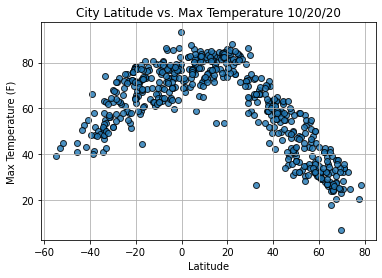

In [76]:
# Build the scatter plot for latitudes vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

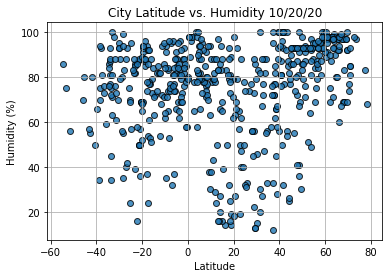

In [77]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

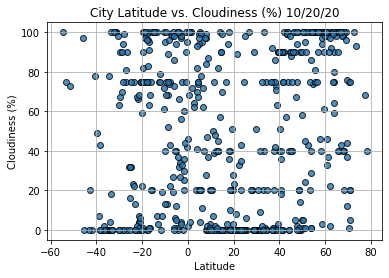

In [78]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

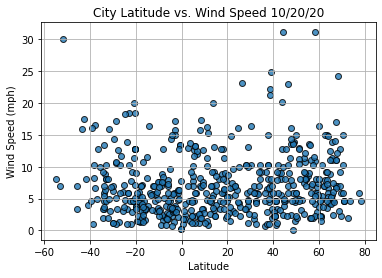

In [79]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [80]:
# Create a function to perform a linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_vale, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [81]:
index13 = city_data_df.loc[13]
index13

City                   Nove Zamky
Country                        SK
Date          2020-10-21 03:32:08
Lat                         47.99
Lng                         18.16
Max Temp                    46.99
Humidity                       81
Cloudiness                    100
Wind Speed                  13.49
Name: 13, dtype: object

In [82]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Husavik,IS,2020-10-21 03:30:07,66.04,-17.34,24.80,92,40,4.70
3,Dikson,RU,2020-10-21 03:32:06,73.51,80.55,24.62,97,93,4.63
5,Vardo,NO,2020-10-21 03:32:06,70.37,31.11,32.00,77,75,10.29
6,Qaanaaq,GL,2020-10-21 03:32:07,77.48,-69.36,20.37,83,68,5.84
7,Clyde River,CA,2020-10-21 03:32:07,70.47,-68.59,28.40,74,1,14.99


In [83]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

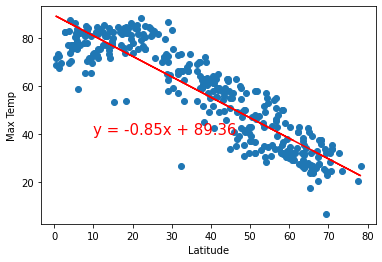

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

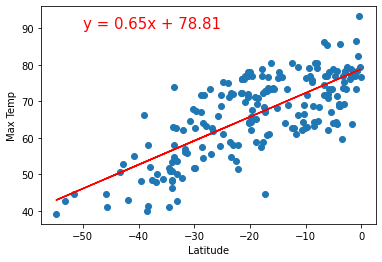

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

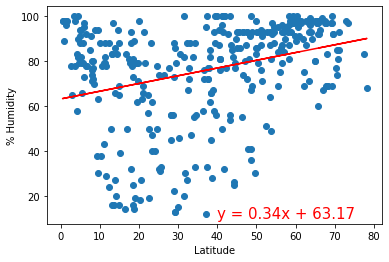

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

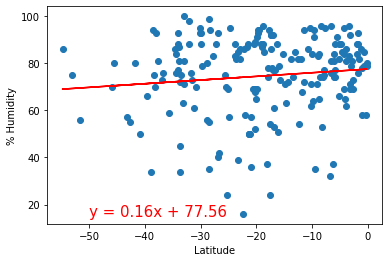

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

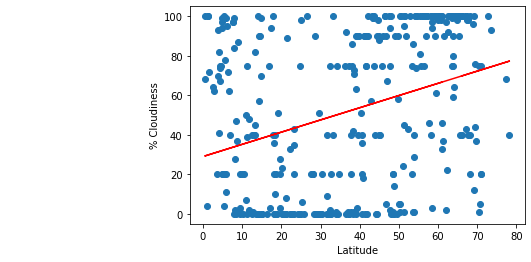

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


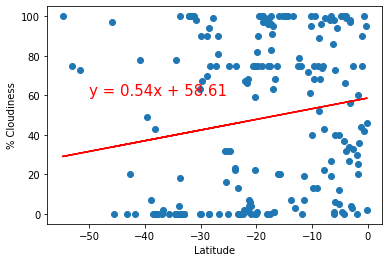

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

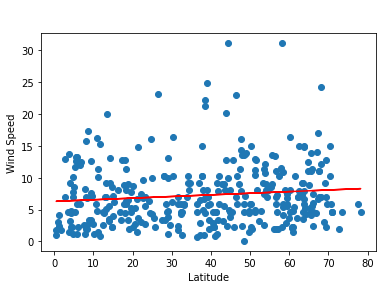

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

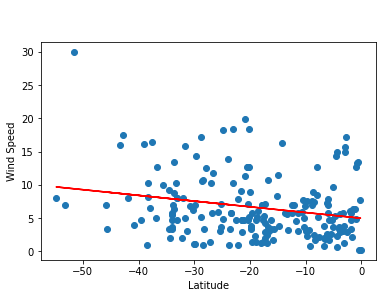

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [92]:
from config2 import g_key

In [93]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Walvis Bay,NaN,2020-10-21 03:32:05,-22.96,14.51,57.99,82,0,10.29
1,1,Husavik,IS,2020-10-21 03:30:07,66.04,-17.34,24.80,92,40,4.70
2,2,Oranjemund,NaN,2020-10-21 03:32:06,-28.55,16.43,57.40,55,0,10.58
3,3,Dikson,RU,2020-10-21 03:32:06,73.51,80.55,24.62,97,93,4.63
4,4,Ushuaia,AR,2020-10-21 03:29:26,-54.80,-68.30,39.20,86,100,8.05


In [94]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [95]:
# Configure gmaps to use API key
gmaps.configure(api_key=g_key)

In [96]:
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])

In [97]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.65)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [98]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [100]:
# Heat map of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

#Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

In [101]:
# Create the heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

#Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

In [103]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [104]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
8,8,Mahebourg,MU,2020-10-21 03:30:11,-20.41,57.70,77.00,69,75,12.75
9,9,Kanniyakumari,IN,2020-10-21 03:28:52,8.08,77.57,81.73,71,28,15.77
22,22,Cockburn Town,TC,2020-10-21 03:28:57,21.46,-71.14,81.63,79,89,14.76
27,27,Bandarbeyla,SO,2020-10-21 03:32:12,9.49,50.81,80.64,63,3,12.68
31,31,Itarema,BR,2020-10-21 03:32:14,-2.92,-39.92,78.35,79,4,15.73
37,37,Amarante,BR,2020-10-21 03:32:16,-6.24,-42.85,85.37,37,86,2.68
40,40,Kulhudhuffushi,MV,2020-10-21 03:27:40,6.62,73.07,82.11,78,62,12.01
44,44,Portel,BR,2020-10-21 03:32:18,-1.94,-50.82,76.14,88,0,6.11
46,46,Georgetown,MY,2020-10-21 03:32:18,5.41,100.34,86.00,66,20,4.70
52,52,Mozarlandia,BR,2020-10-21 03:32:20,-14.74,-50.57,78.06,63,100,3.80


In [105]:
preferred_cities_df.count()

City_ID       152
City          152
Country       152
Date          152
Lat           152
Lng           152
Max Temp      152
Humidity      152
Cloudiness    152
Wind Speed    152
dtype: int64

In [106]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
8,Mahebourg,MU,77.00,-20.41,57.70,
9,Kanniyakumari,IN,81.73,8.08,77.57,
22,Cockburn Town,TC,81.63,21.46,-71.14,
27,Bandarbeyla,SO,80.64,9.49,50.81,
31,Itarema,BR,78.35,-2.92,-39.92,
37,Amarante,BR,85.37,-6.24,-42.85,
40,Kulhudhuffushi,MV,82.11,6.62,73.07,
44,Portel,BR,76.14,-1.94,-50.82,
46,Georgetown,MY,86.00,5.41,100.34,
52,Mozarlandia,BR,78.06,-14.74,-50.57,


In [107]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key,
    
}